In [2]:
#import libraries
import pandas as pd         # data manipulation & analysis
import numpy as np          # numerical & mathematical operations
import matplotlib.pyplot as plt         # for creating visualisations
import seaborn as  sns          # for more advanced visualisations 

In [3]:
#reading data into dataframe
df = pd.read_csv('C:/Users/kohme/Downloads/DAC/Retail_Store.csv' , encoding='latin-1')

In [4]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [5]:
# checking data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [6]:
#check for missing data
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [7]:
#checking for duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 53)


In [8]:
# dropping data not interested due to irrelevency
# refined dropped columns after analysing heatmap
df = df.drop(columns=['Order Zipcode', 'Product Description', 'Customer Email', 'Customer Password', 'Product Image', 'Product Status', 'Customer Fname', 'Customer Lname', 'Order Id', 'Order Item Id', 'Customer Zipcode', 'Order Item Cardprod Id', 'Latitude', 'Longitude'])

In [9]:
# extracting useful data from dates
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month


In [10]:
# obtaining delivery_delay data to analyse how late delivery might affect losses
df['shipping_date'] = pd.to_datetime(df['shipping date (DateOrders)'])
df['delivery_delay'] = (df['shipping_date'] - df['order_date']).dt.days


In [11]:
# time-based sales data
monthly_sales = df.groupby('month')['Sales'].sum()
monthly_sales

# best sales: january
# worst sales: december


month
1     3.459246e+06
2     2.888088e+06
3     3.125112e+06
4     3.053996e+06
5     3.185364e+06
6     3.059152e+06
7     3.188170e+06
8     3.187032e+06
9     3.164511e+06
10    3.171279e+06
11    2.703625e+06
12    2.599160e+06
Name: Sales, dtype: float64

In [12]:
yearly_sales = df.groupby('year')['Sales'].sum()
yearly_sales

# might be incomplete data for year 2018

year
2015    1.234083e+07
2016    1.230382e+07
2017    1.180844e+07
2018    3.316501e+05
Name: Sales, dtype: float64

In [13]:
# checking data after dropping
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id                    180519 non-null  int64         
 8   Category Name                  180519 non-null  object        
 9   Customer City                  180519 non-null  object        
 10  Customer Country               180519 non-null  object        
 11  

In [14]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Street', 'Department Id', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'shipping date (DateOrders)',
       'Shipping Mode', 'order_date', 'year', 'month', 'shipping_date',
       'delivery_delay'],
      dtype='object')

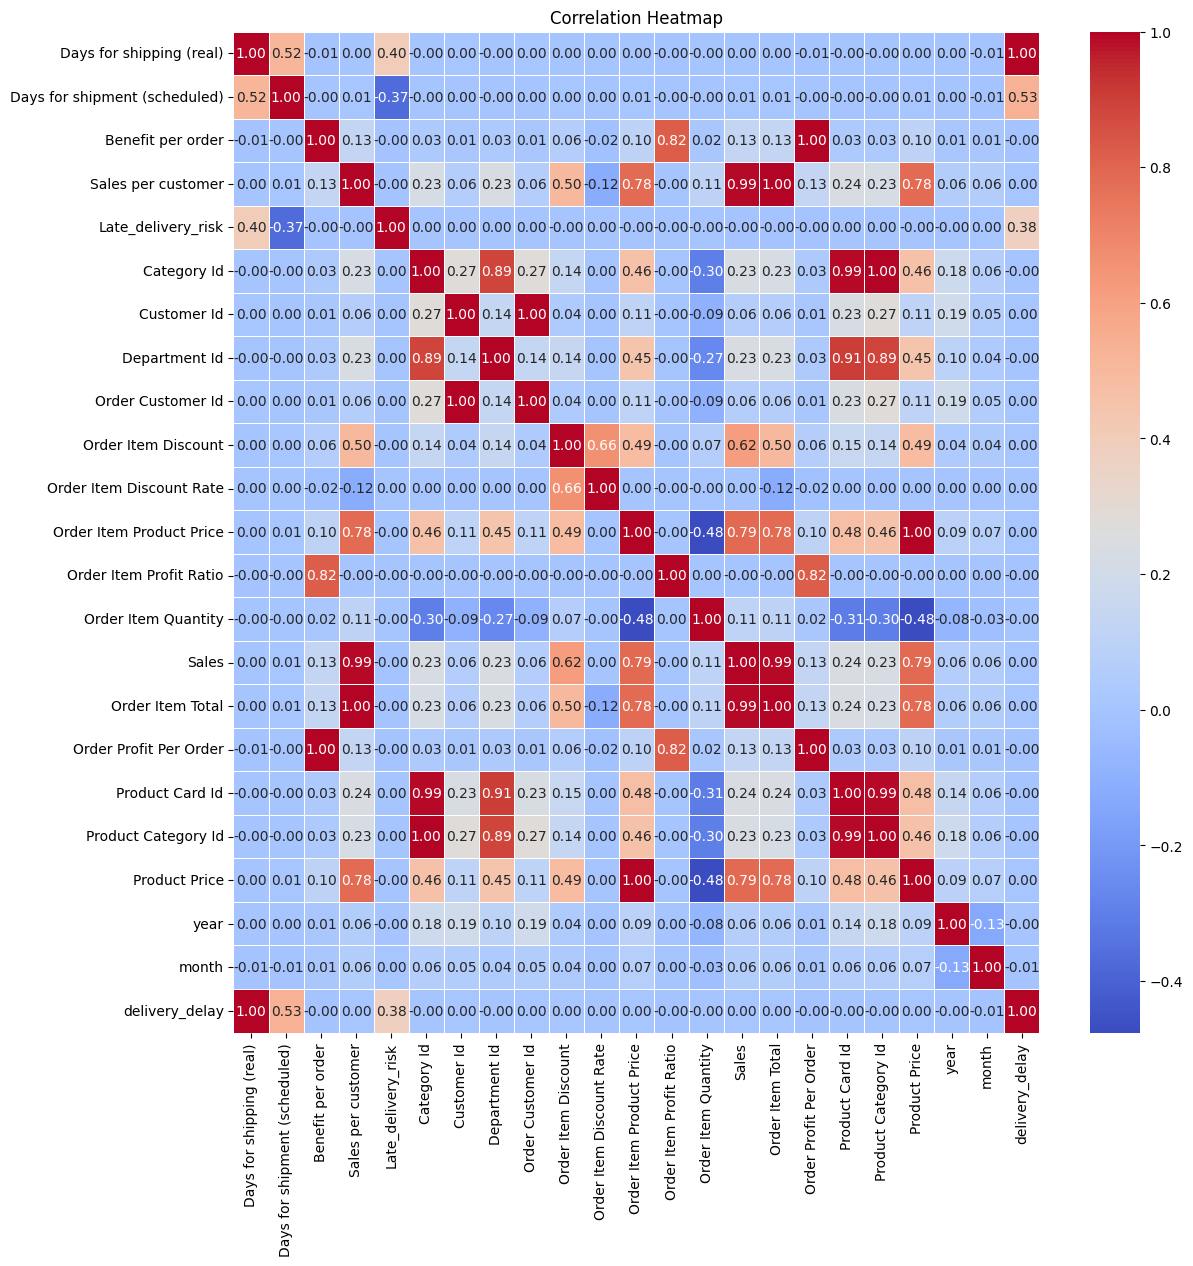

In [15]:
# heatmap to identify the importance of features that could be useful 
# use numeric_only=True, as .corr() can only take float or int 
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(13, 13))  # Optional: Adjust the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


from the above heatmap, some useful data include: <br/>
sales per customer <br/>
order item discount <br/>
product price <br/>

irrelevant/negative correlation: <br/>
order item quantity <br/>
lat/long <br/>
category name <br/>


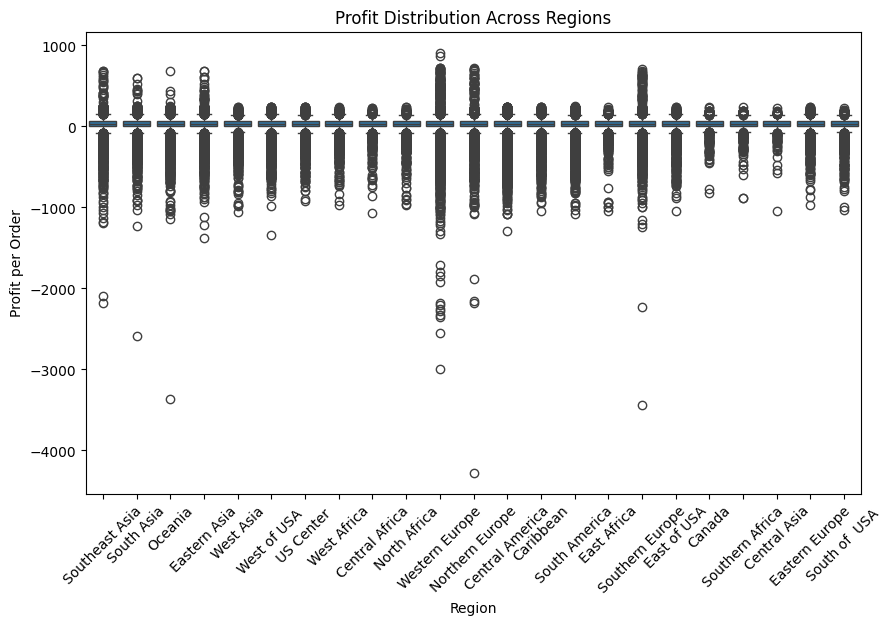

In [16]:
# Boxplot of Order Profit Per Order by Region
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Order Region', y='Order Profit Per Order')
plt.title('Profit Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('Profit per Order')
plt.xticks(rotation=45)
plt.show()

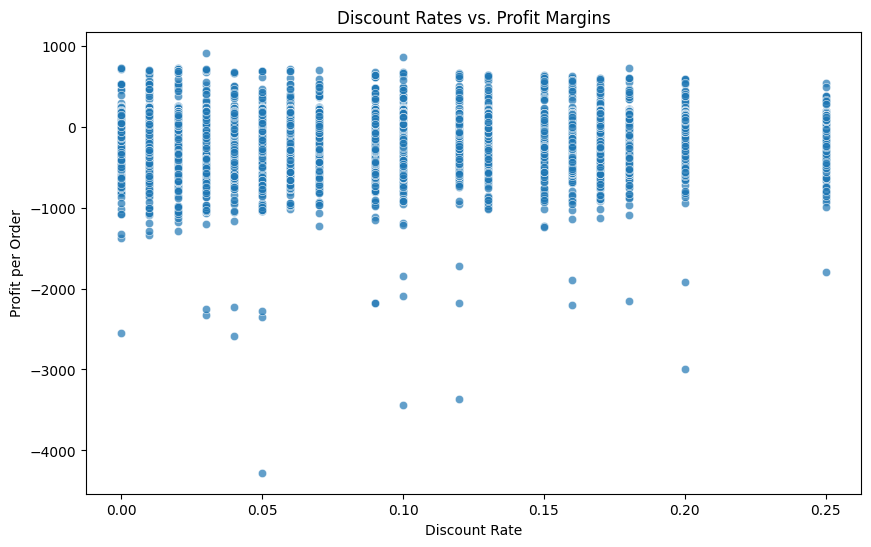

In [17]:
# Scatter plot of Discounts vs. Order Profit Per Order
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Order Item Discount Rate', y='Order Profit Per Order', alpha=0.7)
plt.title('Discount Rates vs. Profit Margins')
plt.xlabel('Discount Rate')
plt.ylabel('Profit per Order')
plt.show()